##### 1.
> Using basic statistical properties of the variance, as well as single variable calculus, derive $(5.6)$. In other words, prove that $\alpha$ given by $(6.5)$ does indeed minimize $\text{Var}(\alpha X + (1-\alpha)Y)$.

**A:** We will first prove a more general statement: 
$$ \text{Var}(aX+bY) = a^2\text{Var}(X) + b^2\text{Var}(Y) + 2ab\text{Cov}(XY) $$
Proof:
$$
\begin{align*}
\text{Var}(aX+bY)
& = \mathbb{E}[(aX+bY)^2] - (\mathbb{E}[aX+bY])^2 \\
& = \mathbb{E}[(aX)^2 + (bY)^2 + 2abXY] - (\mathbb{E}[aX] + \mathbb{E}[bY])^2 \\
& = a^2\mathbb{E}[X^2] + b^2\mathbb{E}[Y^2] + 2ab\mathbb{E}[XY] - (a\mathbb{E}[X])^2 - (b\mathbb{E}[Y])^2 - 2ab\mathbb{E}[X]\mathbb{E}[Y] \\
& = a^2(\mathbb{E}[X^2] - (\mathbb{E}[X])^2) + b^2(\mathbb{E}[Y^2] - (\mathbb{E}[Y])^2) + 2ab(\mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y]) \\
& = a^2\text{Var}(X) + b^2\text{Var}(Y) + 2ab\text{Cov}(XY) \\
\end{align*}
$$
- Note that: $ \mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y] = \text{Cov}(XY) $; This can be proven by multiplying terms inside the definition of $\text{Cov(X, Y)}$ and using the definition of $\mathbb{E}$. <br>
<!-- end list -->
We can now apply to our case with: <br>
- $ a = \alpha $
- $b = 1 - \alpha$
- $\text{Var}(X) = \sigma_X^2$
- $\text{Var}(Y) = \sigma_Y^2$
- $\text{Cov}(X, Y) = \sigma_{XY}$

$$
\begin{align*}
\text{Var}(\alpha X + (1 - \alpha)Y) 
  &= \alpha^2\sigma^2_X + (1-\alpha)^2\sigma^2_Y + 2\alpha(1 - \alpha)\sigma_{XY} \\
  &= \alpha^2\sigma^2_X + \sigma^2_Y - 2\alpha\sigma^2_Y + \alpha^2\sigma^2_Y + 
     2\alpha\sigma_{XY} - 2\alpha^2\sigma_{XY} 
\end{align*}
$$

We can determine if the function is convex (minimum exists) or concave (maximum exists) by finding the second derivative with respect to $\alpha$:
$$
\begin{align*}
\frac{\partial^2}{\partial{\alpha^2}} 
  &=  2\sigma^2_X + 2\sigma^2_Y - 4\sigma_{XY} \\
  &=  2(\sigma^2_X + \sigma^2_Y - 2\sigma_{XY}) \\
  &= 2\mathrm{Var}(X - Y) \geq 0
\end{align*}
$$

There exists a (local?) minimum for $\text{Var}(\alpha X + (1 - \alpha)Y)$, we can find this critical point:
$$
\frac{\partial}{\partial{\alpha}} = 2\alpha\sigma^2_X - 2\sigma^2_Y + 2\alpha\sigma^2_Y + 2\sigma_{XY} - 4\alpha\sigma_{XY} = 0 $$
$$
\begin{align*}
& \Leftrightarrow \qquad \alpha\sigma^2_X + \alpha\sigma^2_Y - 2\alpha\sigma_{XY} = \sigma^2_Y - \sigma_{XY} \\
& \Leftrightarrow \qquad \alpha = \frac{\sigma^2_Y - \sigma_{XY}}{\sigma^2_X + \sigma^2_Y - 2\sigma_{XY}} \\
\end{align*}
$$

##### 2.
> We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of $n$ observations.

> (a) What is the probability that the first bootstrap observation is $not$ the $j^{th}$ observation from the original sample? Justify your answer.

**A:** $P(\text{not choose } j^{th}) = 1 - P(\text{choose } j^{th}) = 1 - 1/n$.

> (b) What is the probability that the second bootstrap observation is $not$ the $j^{th}$ observation from the original sample?

**A:** I am not sure what exactly the question is asking.
1. If it's asking if the $j^{th}$ observation is _not_ chosen for the second pick and we _don't_ care about results of other positions: Bootstrap samples with replacement, meaning each draw is independent another. 
$$ P(\text{not second pick}) = P(\text{not first pick}) = 1 - 1/n$$
2. If it's asking if the $j^{th}$ observation is _not_ chosen for the second pick and we _do_ care that up to the second pick, $j^{th}$ has never been chosen: 
$$P(\text{not chosen up to second pick}) = P(\text{not first pick}) * P(\text{not second pick}) = (1 - 1/n)^2$$

> (c) Argue that the probability that the $j^{th}$ observation is $not$ in the bootstrap sample is $(1 - 1/n)^n$.

**A:** Similar to the second option of $(b)$, if none of the picks for the bootstrap sample contains $j^{th}$ observations, meaning it is not chosen $n$ times consecutively. The probability of this is $(1 - 1/n)^n$.

> (d) When $n = 5$, what is the probability that the $j^{th}$ observation is in the bootstrap sample?

**A:** $P(\text{contain } j^{th}) = 1 - P(\text{contain } j^{th})^C = 1 - (1 - 1/n)^n = 1 - (1 - 1/5)^5$.

> (e) When $n = 100$, what is the probability that the $j^{th}$ observation is in the bootstrap sample?

**A:** Similar to last question: $P(\text{contain } j^{th}) = 1 - (1 - 1/100)^{100}$.

> (f) When $n = 10,000$, what is the probability that the $j^{th}$ observation is in the bootstrap sample?

**A:** Similar to last question: $P(\text{contain } j^{th}) = 1 - (1 - 1/10,000)^{10,000}$.

> (g) Create a plot that displays, for each integer value of n from $1$ to $100,000$, the probability that the $j^{th}$ observation is in the bootstrap sample. Comment on what you observe.

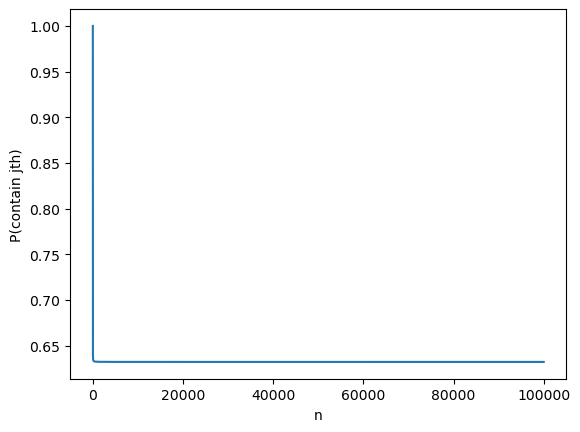

In [2]:
import numpy as np
from matplotlib.pyplot import subplots

Xs = np.arange(1, 100000)
ys = 1 - (1 - 1/Xs)**Xs

_, ax = subplots()
ax.set_xlabel('n')
ax.set_ylabel('P(contain jth)')
ax.plot(Xs, ys);

**A:** As we increase n, the probability converges to a certain value. We can find the exact value by taking the limit as $n$ tends to _infinity_:
$$ \lim_{n\to \infty}{1 - (1 - \frac{x}{n})^n} = 1 - \lim_{n\to \infty}{(1 - \frac{x}{n})^n} = 1 - e^x $$
- Proof for the limit can be found at: https://math.stackexchange.com/questions/358830/about-lim-left1-frac-xn-rightn <br>
<!-- end list -->
In the case of $x = -1$, the expression converges to $1 - e^{-1} \approx 0.63 $

> (h) We will now investigate numerically the probability that a bootstrap sample of size $n=100$ contains the $j^{th}$ observation. Here $j=4$. We first create an array `store` with values that will subsequently be overwritten using the function `np.empty()`. We then repeatedly create bootstrap samples, and each time we record whether or not the fifth observation is contained in the bootstrap sample.

In [17]:
# Note: I have adjusted the code for readability
rng = np.random.default_rng(10)
num_bootstraps = 10000  # number of bootstraps
n = 100  # size of each bootstrap

store = np.empty(num_bootstraps)
for i in range(num_bootstraps):
    store[i] = np.sum(rng.choice(n, replace=True) == 4) > 0
np.mean(store)

0.0089

> Comment on the results obtained.

**A:** _Note_: I believe the code provided and the question do not entire match. The given code is checking if the $j^{th}$ observation is chosen at any given pick, which is similar to case $1$ in my answer for part $(b)$. The result of the code is in the range of what we would expect it to be: $1/n = 1/100 = 0.01$. We can adjust the code to increase `num_bootstrap` and the result does approach our expectation at $0.01$. <br><br>
The code for case $2$ will be as below; please refer to `numpy`'s documentation for `choice` for more information. <br>
In case $2$, we can see that the result, again, follows well to the expectation that we have derived in part $(g)$.

In [29]:
rng = np.random.default_rng(10)
num_bootstraps = 10000  # number of bootstraps
n = 100  # size of each bootstrap

store = np.empty(num_bootstraps)
for i in range(num_bootstraps):
    store[i] = np.sum(rng.choice(n, size=n, replace=True) == 4) > 0
np.mean(store)

0.6362

##### 3.
> We now review $k$-fold cross-validation.

> (a) Explain how $k$-fold cross-validation is implemented.

**A:** We first divide the data set into $k$ equal size smaller sets. Use $k-1$ sets to train and validate using the left out set. We repeat this process $k$ times, each of the $k$ set will be used as validation set once.

> (b) What are teh advantages and disadvantages of $k$-fold cross-validation relative to:
> <ol type="i">
> <li>The validation set approach?</li>
> <li>LOOCV?</li>
> </ol>


**A:**
Advantages:
- over Validation Set approach:
    - less affected by the choice of the division, leading to closer estimate for test error rate (lower variance)
    - more data can be used for training when $k > 2$ (less bias)
- over LOOCV:
    - less expensive computationally when $k < n$
<!-- end list -->
Disadvantages:
- to Validation Set approach:
    - more expensive computationally (training and testing $k$ times vs. $1$ time)
- to LOOCV:
    - higher variance since LOOCV use more observations for training

##### 4.
> Suppose that we use some statistical learning method to make a prediction for the response $Y$ for a particular value of the predictor $X$. Carefully describe how we might estimate the standard deviation of our prediction.

**A:** We can use Bootstrap method for validation and find the variance of our predictions. <br>
From the original data set $Z$, create $B$ bootstrap datasets ($BD$): $Z^{*1}, Z^{*2}, …, Z^{*B}$. Each $BD$ prediction' validation has certain error rate, respectively: $\epsilon^{*1}, \epsilon^{*2}, …, \epsilon^{*B}$. <br><br>
We can now apply the variance formula to estimate our prediction variance:
$$ \text{Var(prediction error)} = \frac{1}{B-1} \sum_{i=1}^{B}{(\epsilon^{*i} - \bar{\epsilon})^2} $$